In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('petr4_treinamento_ex.csv')
base.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0


In [3]:
base.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
1342,2018-05-23,24.230000,24.48,23.27,23.270000,23.270000,74622500.0
1343,2018-05-24,20.049999,20.75,19.65,20.080000,20.080000,240343800.0
1344,2018-05-25,20.650000,21.27,19.66,19.799999,19.799999,131188100.0


In [4]:
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values

In [5]:
base_treinamento.shape

(1342, 1)

In [6]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [7]:
previsores = []
preco_real = []
for i in range(90, 1342):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores.shape

(1252, 90)

In [8]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(1252, 90, 1)

In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 90, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 50)            30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [10]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
40/40 [==============================] - 8s 192ms/step - loss: 0.0321 - mean_absolute_error: 0.1263
Epoch 2/100
40/40 [==============================] - 7s 184ms/step - loss: 0.0158 - mean_absolute_error: 0.0953
Epoch 3/100
40/40 [==============================] - 6s 160ms/step - loss: 0.0130 - mean_absolute_error: 0.0869
Epoch 4/100
40/40 [==============================] - 7s 174ms/step - loss: 0.0100 - mean_absolute_error: 0.0767
Epoch 5/100
40/40 [==============================] - 7s 166ms/step - loss: 0.0093 - mean_absolute_error: 0.0732
Epoch 6/100
40/40 [==============================] - 7s 181ms/step - loss: 0.0082 - mean_absolute_error: 0.0684
Epoch 7/100
40/40 [==============================] - 7s 185ms/step - loss: 0.0073 - mean_absolute_error: 0.0646
Epoch 8/100
40/40 [==============================] - 6s 161ms/step - loss: 0.0064 - mean_absolute_error: 0.0607
Epoch 9/100
40/40 [==============================] - 6s 154ms/step - loss: 0.0066 - mean_absolute_error:

In [11]:
base_teste = pd.read_csv('petr4_teste_ex.csv')
base_teste.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-28,19.200001,19.200001,16.910000,16.910000,16.910000,134504900
1,2018-05-29,18.000000,19.440001,17.600000,19.299999,19.299999,181509800
2,2018-05-30,18.389999,19.969999,18.129999,18.980000,18.980000,125430000


In [12]:
base_teste.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
16,2018-06-20,15.84,16.48,15.80,16.209999,16.209999,88397300
17,2018-06-21,16.09,16.32,15.10,15.100000,15.100000,67884300
18,2018-06-22,15.41,15.68,15.01,15.110000,15.110000,52184500


In [13]:
base_teste.shape

(19, 7)

In [14]:
preco_real_teste = base_teste.iloc[:, 1:2].values

In [15]:
base.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0


In [16]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
base_completa.head(3)

0    19.990000
1    19.809999
2    20.330000
Name: Open, dtype: float64

In [17]:
base_completa.tail(3)

16    15.84
17    16.09
18    15.41
Name: Open, dtype: float64

In [18]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

In [19]:
entradas.shape

(109, 1)

In [20]:
X_teste = []
for i in range(90, 109):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste.shape

(19, 90)

In [21]:
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
X_teste.shape

(19, 90, 1)

In [22]:
previsoes = regressor.predict(X_teste)
previsoes.shape

(19, 1)

In [23]:
previsoes = normalizador.inverse_transform(previsoes)

In [24]:
print(previsoes.mean())
print(preco_real_teste.mean())

16.497597
16.379473684210524


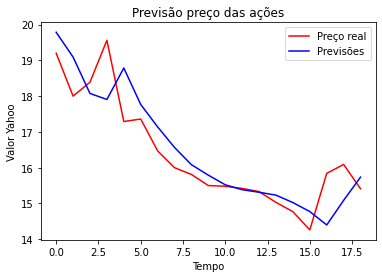

In [25]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()